## importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## DATASET:

The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

In [3]:
#Removing Serial
X = X[:, 1:]
#Split the Dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)
#print(X_test)

In [4]:
#Fitting LinearRegression to Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
regressor.score(X_test,y_test)


0.7248631204868361

### creating and loading the regressor model in the pickle file

In [6]:
pickle.dump(regressor,open('model.pkl','wb'))#wb->write binary

In [7]:
#predicting with Test Set
y_pred = regressor.predict(X_test)
print(y_pred.reshape(-1,1))

[[0.69594583]
 [0.69531598]
 [0.77796998]
 [0.61817989]
 [0.7247928 ]
 [0.60218799]
 [0.71048293]
 [0.63916573]
 [0.87559617]
 [0.92084423]
 [0.54278379]
 [0.88353367]
 [0.71127147]
 [0.45526426]
 [0.85402767]
 [0.62577793]
 [0.62745089]
 [0.81617957]
 [0.58111709]
 [0.73401949]
 [0.87706644]
 [0.84600799]
 [0.66147497]
 [0.45433794]
 [0.78214649]
 [0.58094677]
 [0.49275279]
 [0.64066165]
 [0.8862293 ]
 [0.65010191]
 [0.6374141 ]
 [0.73790273]
 [0.73954863]
 [0.55803217]
 [0.78493659]
 [0.77151538]
 [0.64684602]
 [0.86369682]
 [0.62995342]
 [0.93172217]
 [0.7242529 ]
 [0.67437197]
 [0.70663605]
 [0.80480939]
 [0.8322629 ]
 [0.65270716]
 [0.56170848]
 [0.69255255]
 [0.61063319]
 [0.60225469]
 [0.67837763]
 [0.80482499]
 [0.64955776]
 [0.87800506]
 [0.71994695]
 [0.75541661]
 [0.69937068]
 [0.73054837]
 [0.75563362]
 [0.82625047]
 [0.7774574 ]
 [0.47372219]
 [0.63883857]
 [0.52138549]
 [0.83966033]
 [0.8234211 ]
 [0.74026604]
 [0.86598401]
 [0.77176816]
 [0.7528685 ]
 [0.59786378]
 [0.82

## Exploratory Data Analysis

In [8]:
X_test

array([[309.  , 105.  ,   5.  ,   3.5 ,   3.5 ,   8.56,   0.  ],
       [308.  , 110.  ,   4.  ,   3.5 ,   3.  ,   8.6 ,   0.  ],
       [326.  , 110.  ,   3.  ,   3.5 ,   3.5 ,   8.76,   1.  ],
       [306.  , 105.  ,   2.  ,   3.  ,   2.5 ,   8.26,   0.  ],
       [316.  , 105.  ,   3.  ,   3.  ,   3.5 ,   8.73,   0.  ],
       [309.  , 100.  ,   2.  ,   3.  ,   3.  ,   8.1 ,   0.  ],
       [312.  , 109.  ,   3.  ,   3.  ,   3.  ,   8.69,   0.  ],
       [312.  , 104.  ,   3.  ,   3.5 ,   4.  ,   8.09,   0.  ],
       [332.  , 118.  ,   2.  ,   4.5 ,   3.5 ,   9.36,   1.  ],
       [331.  , 117.  ,   4.  ,   4.5 ,   5.  ,   9.42,   1.  ],
       [300.  , 105.  ,   1.  ,   1.  ,   2.  ,   7.8 ,   0.  ],
       [333.  , 113.  ,   5.  ,   4.  ,   4.  ,   9.28,   1.  ],
       [320.  , 110.  ,   2.  ,   4.  ,   3.5 ,   8.56,   0.  ],
       [302.  ,  99.  ,   1.  ,   2.  ,   2.  ,   7.25,   0.  ],
       [328.  , 112.  ,   4.  ,   4.  ,   4.5 ,   9.1 ,   1.  ],
       [311.  , 104.  ,  

In [9]:
#Plotting Each Independent Variable with the Dependent One
#CGPA
X_CGPA = X_test[:, 5]
X_CGPA = X_CGPA.reshape(-1,1)
regressorCGPA = LinearRegression()
regressorCGPA.fit(X_CGPA, y_test)

LinearRegression()

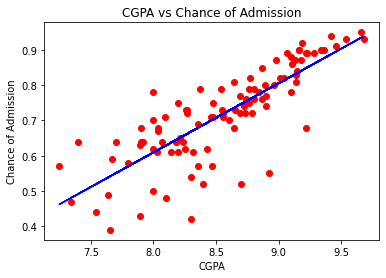

LinearRegression()

In [10]:
plt.scatter(X_CGPA, y_test, color = 'red')
plt.plot(X_CGPA, regressorCGPA.predict(X_CGPA), color = 'blue')
plt.title('CGPA vs Chance of Admission')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.show()
#Research as RS
X_RS = X_test[:, 6]
X_RS = X_RS.reshape(-1,1)
regressorRS = LinearRegression()
regressorRS.fit(X_RS, y_test)

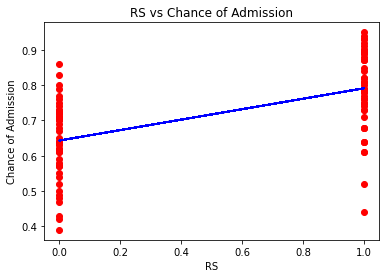

In [11]:
plt.scatter(X_RS, y_test, color = 'red')
plt.plot(X_RS, regressorRS.predict(X_RS), color = 'blue')
plt.title('RS vs Chance of Admission')
plt.xlabel('RS')
plt.ylabel('Chance of Admission')
plt.show()

In [12]:
X_LOR = X_test[:, 4]
X_LOR = X_LOR.reshape(-1,1)
regressorLOR = LinearRegression()
regressorLOR.fit(X_LOR, y_test)


LinearRegression()

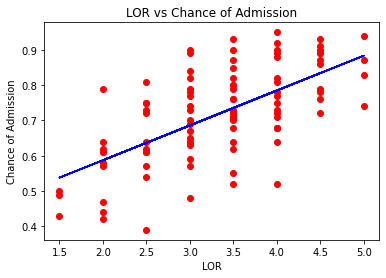

In [13]:
plt.scatter(X_LOR, y_test, color = 'red')
plt.plot(X_LOR, regressorLOR.predict(X_LOR), color = 'blue')
plt.title('LOR vs Chance of Admission')
plt.xlabel('LOR')
plt.ylabel('Chance of Admission')
plt.show()

In [14]:
X_TOEFL = X_test[:, 1]
X_TOEFL = X_TOEFL.reshape(-1,1)
regressorTOEFL = LinearRegression()
regressorTOEFL.fit(X_TOEFL, y_test)

LinearRegression()

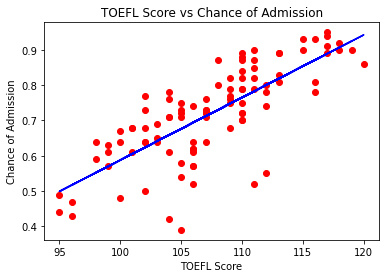

In [15]:
plt.scatter(X_TOEFL, y_test, color = 'red')
plt.plot(X_TOEFL, regressorTOEFL.predict(X_TOEFL), color = 'blue')
plt.title('TOEFL Score vs Chance of Admission')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.show()

In [16]:
X_GRE = X_test[:, 0]
X_GRE = X_GRE.reshape(-1,1)
regressorGRE = LinearRegression()
regressorGRE.fit(X_GRE, y_test)

LinearRegression()

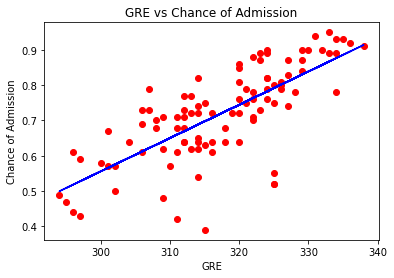

In [17]:
plt.scatter(X_GRE, y_test, color = 'red')
plt.plot(X_GRE, regressorGRE.predict(X_GRE), color = 'blue')
plt.title('GRE vs Chance of Admission')
plt.xlabel('GRE')
plt.ylabel('Chance of Admission')
plt.show()

## predicting from user input

In [18]:
GRE_score=int(input("enter GRE score: "))
TOEFL_score=int(input("enter TOEFL score: "))
university=int(input("enter university rating: "))
SOP=float(input("enter SOP: "))
LOR=float(input("enter LOR: "))
CGPA=float(input("enter CGPA: "))
research=int(input("research done?: "))

enter GRE score: 310
enter TOEFL score: 120
enter university rating: 4
enter SOP: 4.1
enter LOR: 4.2
enter CGPA: 9
research done?: 0


In [19]:
#since X_test is of type list 
lst=[[GRE_score,TOEFL_score,university,SOP,LOR,CGPA,research]]#since X_test is 2d list
print(lst)

[[310, 120, 4, 4.1, 4.2, 9.0, 0]]


In [20]:
#predicting with Test Set
y_pred = regressor.predict(lst)
result=y_pred.reshape(-1,1)

In [21]:
result

array([[0.79657568]])

In [22]:
print(type(result))

<class 'numpy.ndarray'>


In [23]:
final_result=float(result)#converting from ndarray to value.,since our dataset has float in target column
final=round(final_result,4)*100
print(final)

79.66
